# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

### Essi Analysis 
* 1. As the original prompt suggested as you approach the equator the temperature in farenheit increases.
* 2. There was no relationship between latitude and humidity, cloudiness. The Data does show that on a whole a majority of cities have humidity greater than 50%. A Amajority of cities seem to have wind speed below 15-20 MPH and it does seem there may be a slight increase in wind speed the higher your altitude but not siginificant enough to draw a conclusion.
* 3. An interesting note is that majority of the cities in the world seem to be in the northern hemisphere, the data set it skewed to that. Which maye this isnt considered skewew since this is in fact true.


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [4]:
# Define lists for variables involved
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
len(cities)

618

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
#define list varaibles
lat = []
temp = []
humidity = []
cloudiness = []
wind = []
cities_list =[]
fail=[]

x=1
y= 1

for city in cities:
    query_url = f"{url}appid={api_key}&q={city}&units={units}"

    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    try:
        lat.append(weather_json['coord']['lat'])
        temp.append(weather_json['main']['temp_max'])
        humidity.append(weather_json['main']['humidity'])
        cloudiness.append(weather_json['clouds']['all'])
        wind.append(weather_json['wind']['speed'])
        cities_list.append(city)
        print("Processing Record: ", x ,"out of 50 for set " ,y,": ",city)
        print("------------------------")
        if x > 50:
            y = y+1
            x=1
        else:
            x=x+1
    except KeyError:
        print("City Not Found: " + (city))
        

Processing Record:  1 out of 50 for set  1 :  kapaa
------------------------
Processing Record:  2 out of 50 for set  1 :  san cristobal
------------------------
Processing Record:  3 out of 50 for set  1 :  ushuaia
------------------------
Processing Record:  4 out of 50 for set  1 :  bredasdorp
------------------------
Processing Record:  5 out of 50 for set  1 :  busselton
------------------------
Processing Record:  6 out of 50 for set  1 :  iqaluit
------------------------
City Not Found: tsihombe
Processing Record:  7 out of 50 for set  1 :  komsomolskiy
------------------------
Processing Record:  8 out of 50 for set  1 :  talnakh
------------------------
Processing Record:  9 out of 50 for set  1 :  cockburn town
------------------------
Processing Record:  10 out of 50 for set  1 :  hithadhoo
------------------------
Processing Record:  11 out of 50 for set  1 :  balsas
------------------------
City Not Found: taolanaro
Processing Record:  12 out of 50 for set  1 :  nikolskoye

Processing Record:  49 out of 50 for set  2 :  abu samrah
------------------------
Processing Record:  50 out of 50 for set  2 :  geraldton
------------------------
Processing Record:  51 out of 50 for set  2 :  carnarvon
------------------------
Processing Record:  1 out of 50 for set  3 :  walvis bay
------------------------
Processing Record:  2 out of 50 for set  3 :  faya
------------------------
Processing Record:  3 out of 50 for set  3 :  butaritari
------------------------
Processing Record:  4 out of 50 for set  3 :  petropavlovsk-kamchatskiy
------------------------
City Not Found: sentyabrskiy
City Not Found: bengkulu
Processing Record:  5 out of 50 for set  3 :  nioro
------------------------
Processing Record:  6 out of 50 for set  3 :  winnipeg
------------------------
Processing Record:  7 out of 50 for set  3 :  salisbury
------------------------
Processing Record:  8 out of 50 for set  3 :  tigil
------------------------
Processing Record:  9 out of 50 for set  3 :  b

City Not Found: taburi
Processing Record:  44 out of 50 for set  4 :  te anau
------------------------
Processing Record:  45 out of 50 for set  4 :  palana
------------------------
Processing Record:  46 out of 50 for set  4 :  sinnamary
------------------------
Processing Record:  47 out of 50 for set  4 :  lebu
------------------------
Processing Record:  48 out of 50 for set  4 :  beachwood
------------------------
Processing Record:  49 out of 50 for set  4 :  sao joao da barra
------------------------
Processing Record:  50 out of 50 for set  4 :  salinopolis
------------------------
Processing Record:  51 out of 50 for set  4 :  beni
------------------------
Processing Record:  1 out of 50 for set  5 :  suhbaatar
------------------------
Processing Record:  2 out of 50 for set  5 :  easton
------------------------
City Not Found: illoqqortoormiut
City Not Found: samalaeulu
Processing Record:  3 out of 50 for set  5 :  hjelset
------------------------
Processing Record:  4 out of

Processing Record:  41 out of 50 for set  6 :  maxixe
------------------------
City Not Found: warqla
Processing Record:  42 out of 50 for set  6 :  champerico
------------------------
City Not Found: dalgopol
City Not Found: olafsvik
Processing Record:  43 out of 50 for set  6 :  mount isa
------------------------
Processing Record:  44 out of 50 for set  6 :  plettenberg bay
------------------------
Processing Record:  45 out of 50 for set  6 :  soligalich
------------------------
Processing Record:  46 out of 50 for set  6 :  sahibganj
------------------------
Processing Record:  47 out of 50 for set  6 :  quatre cocos
------------------------
Processing Record:  48 out of 50 for set  6 :  khani
------------------------
Processing Record:  49 out of 50 for set  6 :  krapivinskiy
------------------------
Processing Record:  50 out of 50 for set  6 :  chokurdakh
------------------------
Processing Record:  51 out of 50 for set  6 :  juterbog
------------------------
City Not Found: ba

Processing Record:  37 out of 50 for set  8 :  san jose
------------------------
Processing Record:  38 out of 50 for set  8 :  cabinda
------------------------
Processing Record:  39 out of 50 for set  8 :  xining
------------------------
Processing Record:  40 out of 50 for set  8 :  luba
------------------------
Processing Record:  41 out of 50 for set  8 :  kahului
------------------------
Processing Record:  42 out of 50 for set  8 :  izmit
------------------------
Processing Record:  43 out of 50 for set  8 :  barranco
------------------------
Processing Record:  44 out of 50 for set  8 :  nemuro
------------------------
Processing Record:  45 out of 50 for set  8 :  smithers
------------------------
Processing Record:  46 out of 50 for set  8 :  belturbet
------------------------
Processing Record:  47 out of 50 for set  8 :  alofi
------------------------
Processing Record:  48 out of 50 for set  8 :  banfora
------------------------
Processing Record:  49 out of 50 for set  8 

Processing Record:  33 out of 50 for set  10 :  roswell
------------------------
Processing Record:  34 out of 50 for set  10 :  carutapera
------------------------
Processing Record:  35 out of 50 for set  10 :  ucluelet
------------------------
Processing Record:  36 out of 50 for set  10 :  iracoubo
------------------------
Processing Record:  37 out of 50 for set  10 :  koutiala
------------------------
Processing Record:  38 out of 50 for set  10 :  pangai
------------------------
City Not Found: akyab
Processing Record:  39 out of 50 for set  10 :  jabinyanah
------------------------
Processing Record:  40 out of 50 for set  10 :  rocha
------------------------
Processing Record:  41 out of 50 for set  10 :  davila
------------------------
Processing Record:  42 out of 50 for set  10 :  cidreira
------------------------
Processing Record:  43 out of 50 for set  10 :  ballina
------------------------
Processing Record:  44 out of 50 for set  10 :  fontem
------------------------
P

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
print(str(len(cities_list)))
print(str(len(lat)))                         
print(str(len(temp)))
print(str(len(cloudiness)))
print(str(len(wind)))

#create data frame to compile needed data sets
master_df = pd.DataFrame({"City":cities_list,
                              "Latitude":lat,
                              "Temperature":temp,
                              "Humidity":humidity,
                              "Wind Speed mph":wind,
                               "Cloudiness":cloudiness})
master_df.head()

557
557
557
557
557


,City,Latitude,Temperature,Humidity,Wind Speed mph,Cloudiness
0,kapaa,22.08,71.6,78,21.92,75
1,san cristobal,-0.39,73.4,49,6.93,75
2,ushuaia,-54.81,53.6,81,3.36,20
3,bredasdorp,-34.53,72.0,83,8.05,8
4,busselton,-33.64,52.0,50,13.24,8


In [7]:
master_df.to_csv("500+CitiesForTempAnalysis.csv", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

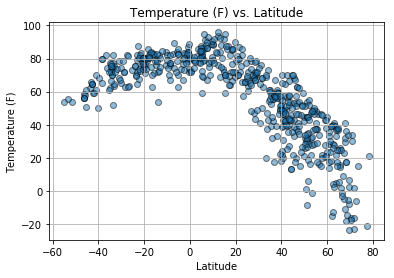

In [8]:
plt.scatter(master_df["Latitude"],master_df["Temperature"], alpha = 0.5, linewidth=1, edgecolor = "black")

plt.grid()
plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
plt.savefig("Temperature.png")
plt.show()

#### Latitude vs. Humidity Plot

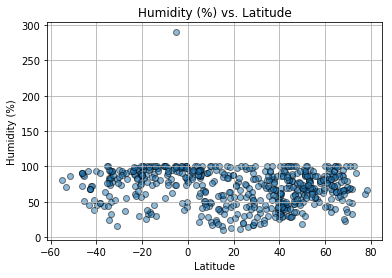

In [9]:
plt.scatter(master_df["Latitude"],master_df["Humidity"], alpha = 0.5, linewidth=1, edgecolor = "black")

plt.grid()
plt.title("Humidity (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

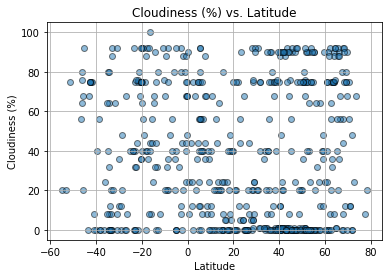

In [10]:
plt.scatter(master_df["Latitude"],master_df["Cloudiness"], alpha = 0.5, linewidth=1, edgecolor = "black")

plt.grid()
plt.title("Cloudiness (%) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

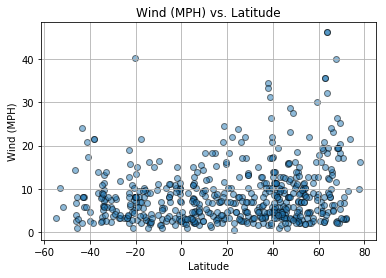

In [11]:
plt.scatter(master_df["Latitude"],master_df["Wind Speed mph"], alpha = 0.5, linewidth=1, edgecolor = "black")

plt.grid()
plt.title("Wind (MPH) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind (MPH)")
plt.savefig("Wind.png")
plt.show()